# <span style="color:darkblue">ABO Systematic Review - R2 for BoxPlots</span> 

Author: Kiana Lee Martinez\
Date: 2023

# <span style="color:dodgerblue">Background Information</span>

Linkage disequilibrium (LD) was caluclated via r^2 between tag SNPs and the functional SNPs that genetically determine ABO blood type alleles (A, B, and O) by Andrew Klein using [LDlink](https://ldlink.nih.gov/?tab=home). I want to get summary statitics on these data so I need to do the following: 

1. Subset out data from subpopulations only
2. Break up the data by populations
3. Run summary stats for each population and tag SNP independently
4. Merge the datasets

# <span style="color:dodgerblue">Import Packages</span>

In [110]:
# importing necessary packages
import pandas as pd
import numpy as np
import os 
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
# set useful variables
directory = "../"

# <span style="color:dodgerblue">Read in datasets</span>

In [112]:
# read in csv files
# o data
df_o = pd.read_csv(f"{directory}data/r2_values/ldlink_o_merged_data.csv")
# ab data
df_ab = pd.read_csv(f"{directory}data/r2_values/ldlink_merged_data_rs8176746.csv")

# <span style="color:dodgerblue">LD Data</span>

## O data

In [113]:
df_o.head()

,Tag SNP,Functional SNP,Population,R2,D',Continent
0,rs505922,rs8176719,ALL,0.7625,0.8930,NaN
1,rs505922,rs8176719,ITU,0.9174,0.9783,SAS
2,rs505922,rs8176719,STU,0.9784,1.0000,SAS
3,rs505922,rs8176719,BEB,0.9313,0.9764,SAS
4,rs505922,rs8176719,PJL,0.9367,0.9783,SAS


In [114]:
# select continental ancestries
df_o_anc = df_o.loc[
    (df_o['Population'] == 'ALL') |
    (df_o['Population'] == 'AFR') |
    (df_o['Population'] == 'AMR') |
    (df_o['Population'] == 'EAS') |
    (df_o['Population'] == 'EUR') |
    (df_o['Population'] == 'SAS')
    
]

In [115]:
# simplify
df_o_anc = df_o_anc[['Tag SNP', 'Functional SNP', 'Population', 'R2']]
df_o_anc.head()

,Tag SNP,Functional SNP,Population,R2
0,rs505922,rs8176719,ALL,0.7625
6,rs505922,rs8176719,SAS,0.9331
11,rs505922,rs8176719,EUR,0.8687
17,rs505922,rs8176719,EAS,0.9460
19,rs505922,rs8176719,AFR,0.4375


In [116]:
# pivot the table and reset index
df_o_anc_piv = df_o_anc.pivot(index='Tag SNP', columns='Population', values='R2').reset_index()
df_o_anc_piv

Population,Tag SNP,AFR,ALL,AMR,EAS,EUR,SAS
0,rs505922,0.4375,0.7625,0.8204,0.9460,0.8687,0.9331
1,rs514659,0.3019,0.6861,0.8000,0.9542,0.8565,0.9331
2,rs529565,0.3872,0.7280,0.7977,0.9379,0.8608,0.9331
3,rs612169,0.3008,0.6847,0.8000,0.9542,0.8528,0.9331
4,rs657152,0.3427,0.7472,0.9097,0.9256,0.9713,0.9958
5,rs687289,0.4476,0.7609,0.8223,0.9750,0.8603,0.9622
6,rs8176645,0.3955,0.7738,0.9137,0.9460,0.9752,0.9621
7,rs8176693,0.2932,0.3003,0.1600,0.3914,0.1416,0.4467
8,rs8176704,0.1368,0.0903,0.1496,NaN,0.1637,0.0438
9,rs8176719,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [117]:
# add additional information
df_o_anc_piv['functional_variant_rsid'] = 'rs8176719'
df_o_anc_piv['bloodtypes'] = 'o_vs_non-o'
# rename columns
df_o_anc_piv = df_o_anc_piv.rename(columns={
    "AFR" : "R2_afr",
    "ALL" : "R2_all",
    "AMR" : "R2_amr",
    "EAS" : "R2_eas",
    "EUR" : "R2_eur",
    "SAS" : "R2_sas",
    "Tag SNP": "tsnp_rsid",
})
# reorder columns
df_o_anc_piv = df_o_anc_piv[['functional_variant_rsid', 'tsnp_rsid', 'R2_all', 'R2_afr', 'R2_amr', 'R2_eas', 'R2_eur', 'R2_sas', 'bloodtypes']]
df_o_anc_piv

Population,functional_variant_rsid,tsnp_rsid,R2_all,R2_afr,R2_amr,R2_eas,R2_eur,R2_sas,bloodtypes
0,rs8176719,rs505922,0.7625,0.4375,0.8204,0.9460,0.8687,0.9331,o_vs_non-o
1,rs8176719,rs514659,0.6861,0.3019,0.8000,0.9542,0.8565,0.9331,o_vs_non-o
2,rs8176719,rs529565,0.7280,0.3872,0.7977,0.9379,0.8608,0.9331,o_vs_non-o
3,rs8176719,rs612169,0.6847,0.3008,0.8000,0.9542,0.8528,0.9331,o_vs_non-o
4,rs8176719,rs657152,0.7472,0.3427,0.9097,0.9256,0.9713,0.9958,o_vs_non-o
5,rs8176719,rs687289,0.7609,0.4476,0.8223,0.9750,0.8603,0.9622,o_vs_non-o
6,rs8176719,rs8176645,0.7738,0.3955,0.9137,0.9460,0.9752,0.9621,o_vs_non-o
7,rs8176719,rs8176693,0.3003,0.2932,0.1600,0.3914,0.1416,0.4467,o_vs_non-o
8,rs8176719,rs8176704,0.0903,0.1368,0.1496,NaN,0.1637,0.0438,o_vs_non-o
9,rs8176719,rs8176719,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,o_vs_non-o


## A/B Data

In [118]:
# select continental ancestries
df_ab_anc = df_ab.loc[
    (df_ab['Population'] == 'ALL') |
    (df_ab['Population'] == 'AFR') |
    (df_ab['Population'] == 'AMR') |
    (df_ab['Population'] == 'EAS') |
    (df_ab['Population'] == 'EUR') |
    (df_ab['Population'] == 'SAS')
    
]

In [119]:
# simplify
df_ab_anc = df_ab_anc[['Tag SNP', 'Functional SNP', 'Population', 'R2']]
df_ab_anc.head()

,Tag SNP,Functional SNP,Population,R2
0,rs7853989,rs8176746,ALL,0.9153
6,rs7853989,rs8176746,SAS,0.9558
11,rs7853989,rs8176746,EUR,0.7151
17,rs7853989,rs8176746,EAS,0.9937
19,rs7853989,rs8176746,AFR,0.9581


In [120]:
# pivot the table and reset index
df_ab_anc_piv = df_ab_anc.pivot(index='Tag SNP', columns='Population', values='R2').reset_index()
df_ab_anc_piv

Population,Tag SNP,AFR,ALL,AMR,EAS,EUR,SAS
0,rs7853989,0.9581,0.9153,0.7200,0.9937,0.7151,0.9558
1,rs8176672,0.5418,0.8372,0.9366,0.9558,1.0000,0.9603
2,rs8176720,0.2123,0.2163,0.0511,0.2566,0.1816,0.3452
3,rs8176722,0.7515,0.8465,0.7200,0.9937,0.7221,0.9218
4,rs8176741,0.9893,0.9954,1.0000,0.9937,1.0000,1.0000
5,rs8176743,0.9893,0.9954,1.0000,0.9937,1.0000,1.0000
6,rs8176746,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,rs8176747,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,rs8176749,1.0000,0.9985,1.0000,0.9936,1.0000,1.0000


In [121]:
# add additional information
df_ab_anc_piv['functional_variant_rsid'] = 'rs8176746'
df_ab_anc_piv['bloodtypes'] = 'a_vs_b'
# rename columns
df_ab_anc_piv = df_ab_anc_piv.rename(columns={
    "AFR" : "R2_afr",
    "ALL" : "R2_all",
    "AMR" : "R2_amr",
    "EAS" : "R2_eas",
    "EUR" : "R2_eur",
    "SAS" : "R2_sas",
    "Tag SNP": "tsnp_rsid",
})
# reorder columns
df_ab_anc_piv = df_ab_anc_piv[['functional_variant_rsid', 'tsnp_rsid', 'R2_all', 'R2_afr', 'R2_amr', 'R2_eas', 'R2_eur', 'R2_sas', 'bloodtypes']]
df_ab_anc_piv

Population,functional_variant_rsid,tsnp_rsid,R2_all,R2_afr,R2_amr,R2_eas,R2_eur,R2_sas,bloodtypes
0,rs8176746,rs7853989,0.9153,0.9581,0.7200,0.9937,0.7151,0.9558,a_vs_b
1,rs8176746,rs8176672,0.8372,0.5418,0.9366,0.9558,1.0000,0.9603,a_vs_b
2,rs8176746,rs8176720,0.2163,0.2123,0.0511,0.2566,0.1816,0.3452,a_vs_b
3,rs8176746,rs8176722,0.8465,0.7515,0.7200,0.9937,0.7221,0.9218,a_vs_b
4,rs8176746,rs8176741,0.9954,0.9893,1.0000,0.9937,1.0000,1.0000,a_vs_b
5,rs8176746,rs8176743,0.9954,0.9893,1.0000,0.9937,1.0000,1.0000,a_vs_b
6,rs8176746,rs8176746,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,a_vs_b
7,rs8176746,rs8176747,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,a_vs_b
8,rs8176746,rs8176749,0.9985,1.0000,1.0000,0.9936,1.0000,1.0000,a_vs_b


In [122]:
## merged
ld_anc = pd.concat([df_o_anc_piv, df_ab_anc_piv])
ld_anc

Population,functional_variant_rsid,tsnp_rsid,R2_all,R2_afr,R2_amr,R2_eas,R2_eur,R2_sas,bloodtypes
0,rs8176719,rs505922,0.7625,0.4375,0.8204,0.9460,0.8687,0.9331,o_vs_non-o
1,rs8176719,rs514659,0.6861,0.3019,0.8000,0.9542,0.8565,0.9331,o_vs_non-o
2,rs8176719,rs529565,0.7280,0.3872,0.7977,0.9379,0.8608,0.9331,o_vs_non-o
3,rs8176719,rs612169,0.6847,0.3008,0.8000,0.9542,0.8528,0.9331,o_vs_non-o
4,rs8176719,rs657152,0.7472,0.3427,0.9097,0.9256,0.9713,0.9958,o_vs_non-o
5,rs8176719,rs687289,0.7609,0.4476,0.8223,0.9750,0.8603,0.9622,o_vs_non-o
6,rs8176719,rs8176645,0.7738,0.3955,0.9137,0.9460,0.9752,0.9621,o_vs_non-o
7,rs8176719,rs8176693,0.3003,0.2932,0.1600,0.3914,0.1416,0.4467,o_vs_non-o
8,rs8176719,rs8176704,0.0903,0.1368,0.1496,NaN,0.1637,0.0438,o_vs_non-o
9,rs8176719,rs8176719,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,o_vs_non-o


In [123]:
# export
ld_anc.to_csv(f"{directory}results/ldlink_results/ld_table.txt",
             sep = '\t')

## HeatMap

In [124]:
# restructure table for purposes of a heatmap
ld_heatmap = ld_anc[['tsnp_rsid', 'R2_all', 'R2_afr', 'R2_amr', 'R2_eas', 'R2_eur', 'R2_sas']]

# rename columns
ld_heatmap.rename(columns={
    'R2_all': 'ALL',
    'R2_amr': 'AMR',
    'R2_afr': 'AFR',
    'R2_eur': 'EUR',
    'R2_sas': 'SAS',
    'R2_eas': 'EAS'
}, inplace=True)

# drop some rows
ld_heatmap_b = ld_heatmap[
    (ld_heatmap['tsnp_rsid'] != 'rs8176719') &
    (ld_heatmap['tsnp_rsid'] != 'rs8176747') &
    (ld_heatmap['tsnp_rsid'] != 'rs8176746') &
    (ld_heatmap['tsnp_rsid'] != 'rs8176743') &
    (ld_heatmap['tsnp_rsid'] != 'rs7853989') 
]

ld_heatmap = ld_heatmap_b.set_index('tsnp_rsid')

# reorder rows
ld_heatmap = ld_heatmap.reindex([
    'rs8176704',
    'rs687289',
    'rs8176693',
    'rs657152',
    'rs514659',
    'rs612169',
    'rs8176645',
    'rs505922',
    'rs529565',
    'rs8176749',
    'rs8176741',
    'rs8176722',
    'rs8176720',
    'rs8176672'
])

ld_heatmap

C:\Users\klmartinez\AppData\Local\Temp\ipykernel_26416\1002741252.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ld_heatmap.rename(columns={


Population,ALL,AFR,AMR,EAS,EUR,SAS
tsnp_rsid,,,,,,
rs8176704,0.0903,0.1368,0.1496,NaN,0.1637,0.0438
rs687289,0.7609,0.4476,0.8223,0.9750,0.8603,0.9622
rs8176693,0.3003,0.2932,0.1600,0.3914,0.1416,0.4467
rs657152,0.7472,0.3427,0.9097,0.9256,0.9713,0.9958
rs514659,0.6861,0.3019,0.8000,0.9542,0.8565,0.9331
rs612169,0.6847,0.3008,0.8000,0.9542,0.8528,0.9331
rs8176645,0.7738,0.3955,0.9137,0.9460,0.9752,0.9621
rs505922,0.7625,0.4375,0.8204,0.9460,0.8687,0.9331
rs529565,0.7280,0.3872,0.7977,0.9379,0.8608,0.9331


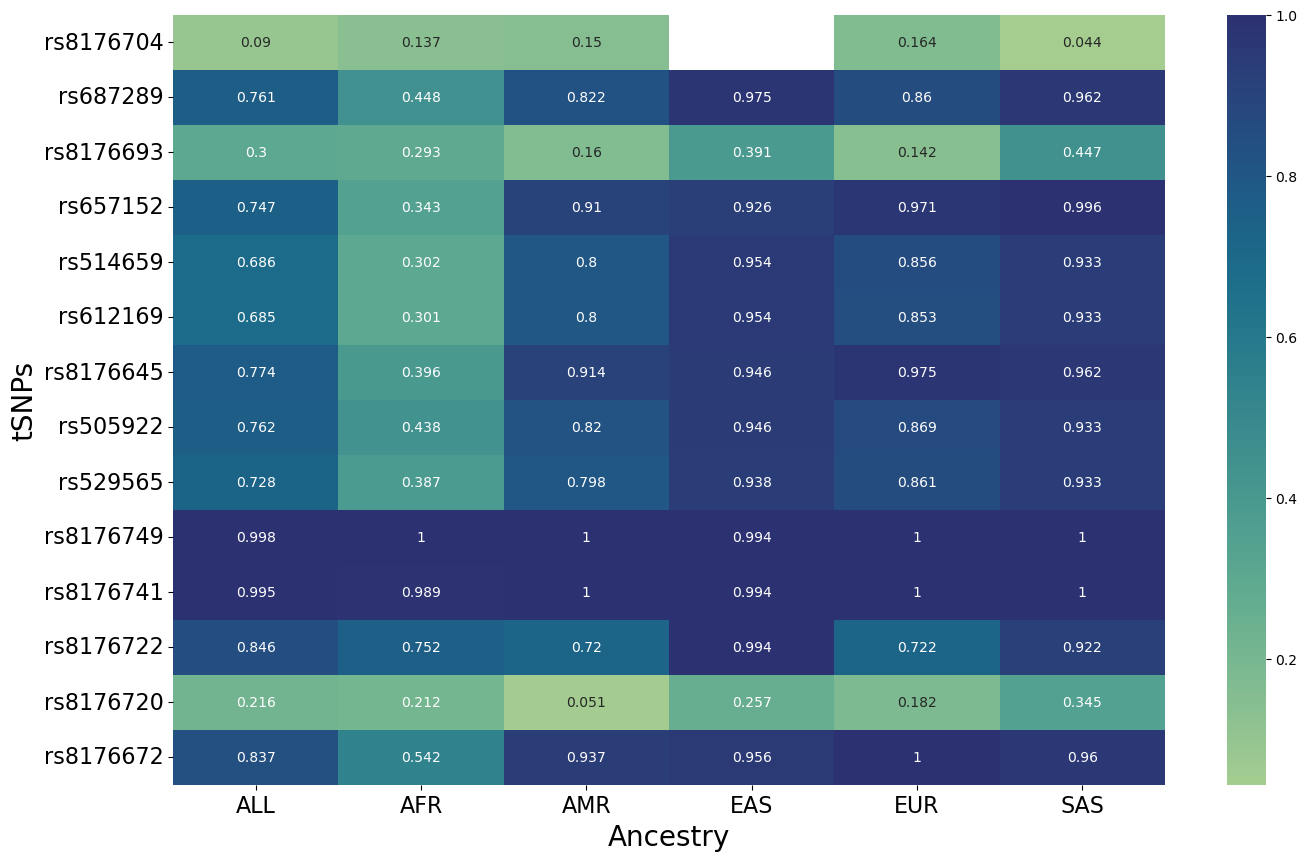

In [125]:
# set figurse size
plt.figure(figsize=(16, 10))
# make heatmap
sns.heatmap(round(ld_heatmap, 3), annot=True,  fmt='g', # g for general format
            cmap='crest') #cmap sets colormap
# x & y labels
plt.xlabel('Ancestry', fontsize=20)
plt.ylabel('tSNPs', fontsize=20)
# x & y ticks
plt.xticks(rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
#plt.title("LD Across Populations in 1000G", fontsize=24)

# save figure
plt.savefig(f"{directory}results/python_figures/1000g_ld_heatmap.svg", 
           format='svg',
           bbox_inches="tight")

# <span style="color:dodgerblue">O data</span>

Just using the data for the subpopulations so need to remove the data from the superpopulations (ALL, AFR, AMR, EAS, EUR, SAS). 

In [126]:
# remove super populations
df_o_subs = df_o.loc[(df_o['Population'] != "ALL") & 
                     (df_o['Population'] != "AFR") & 
                     (df_o['Population'] != "AMR") & 
                     (df_o['Population'] != "EAS") & 
                     (df_o['Population'] != "EUR") &
                     (df_o['Population'] != "SAS")]
df_o_subs

,Tag SNP,Functional SNP,Population,R2,D',Continent
1,rs505922,rs8176719,ITU,0.9174,0.9783,SAS
2,rs505922,rs8176719,STU,0.9784,1.0000,SAS
3,rs505922,rs8176719,BEB,0.9313,0.9764,SAS
4,rs505922,rs8176719,PJL,0.9367,0.9783,SAS
5,rs505922,rs8176719,GIH,0.9045,1.0000,SAS
...,...,...,...,...,...,...
312,rs8176719,rs8176719,GWD,1.0000,1.0000,AFR
313,rs8176719,rs8176719,LWK,1.0000,1.0000,AFR
314,rs8176719,rs8176719,YRI,1.0000,1.0000,AFR
317,rs8176719,rs8176719,STU,1.0000,1.0000,SAS


In [127]:
# subset by continental population

# AFR
df_o_afr = df_o_subs.loc[df_o_subs['Continent'] == "AFR"]
# AMR
df_o_amr = df_o_subs.loc[df_o_subs['Continent'] == "AMR"]
# EAS
df_o_eas = df_o_subs.loc[df_o_subs['Continent'] == "EAS"]
# EUR
df_o_eur = df_o_subs.loc[df_o_subs['Continent'] == "EUR"]
# SAS
df_o_sas = df_o_subs.loc[df_o_subs['Continent'] == "SAS"]

In [128]:
# summary stats grouped by tag SNP

# define function for coefficient of variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x) 

# define variance
var = lambda x: np.var(x)

# AFR
df_o_afr_sum_stat = df_o_afr[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_o_afr_sum_stat['pop'] = 'AFR' # add a new population column
df_o_afr_sum_stat['median'] = df_o_afr[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_o_afr_sum_stat['coefficient_variation'] = df_o_afr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_o_afr_sum_stat['variance'] = df_o_afr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# AMR
df_o_amr_sum_stat = df_o_amr[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_o_amr_sum_stat['pop'] = 'AMR' # add a new population column
df_o_amr_sum_stat['median'] = df_o_amr[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_o_amr_sum_stat['coefficient_variation'] = df_o_amr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_o_amr_sum_stat['variance'] = df_o_amr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# EAS
df_o_eas_sum_stat = df_o_eas[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_o_eas_sum_stat['pop'] = 'EAS' # add a new population column
df_o_eas_sum_stat['median'] = df_o_eas[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_o_eas_sum_stat['coefficient_variation'] = df_o_eas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_o_eas_sum_stat['variance'] = df_o_eas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# EUR
df_o_eur_sum_stat = df_o_eur[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_o_eur_sum_stat['pop'] = 'EUR' # add a new population column
df_o_eur_sum_stat['median'] = df_o_eur[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_o_eur_sum_stat['coefficient_variation'] = df_o_eur[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_o_eur_sum_stat['variance'] = df_o_eur[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# SAS
df_o_sas_sum_stat = df_o_sas[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_o_sas_sum_stat['pop'] = 'SAS' # add a new population column
df_o_sas_sum_stat['median'] = df_o_sas[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_o_sas_sum_stat['coefficient_variation'] = df_o_sas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_o_sas_sum_stat['variance'] = df_o_sas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance

C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axi

In [129]:
# merge the datasets
df_o_sum_stat = pd.concat([df_o_afr_sum_stat,
                           df_o_amr_sum_stat, 
                           df_o_eas_sum_stat,
                           df_o_eur_sum_stat,
                           df_o_sas_sum_stat])

df_o_sum_stat.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'pop', 'median', 'coefficient_variation', 'variance'] # rename columns
df_o_sum_stat['fSNP'] = 'o_snp_rs8176719'
df_o_sum_stat = df_o_sum_stat[['pop', 'count', 'median', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance', 'coefficient_variation', 'fSNP']] # reorder columns
df_o_sum_stat.head()

,pop,count,median,mean,std,min,25%,50%,75%,max,variance,coefficient_variation,fSNP
Tag SNP,,,,,,,,,,,,,
rs505922,AFR,7.0,0.4492,0.446386,0.117614,0.2187,0.42880,0.4492,0.49780,0.6036,0.011857,0.263480,o_snp_rs8176719
rs514659,AFR,7.0,0.3055,0.308014,0.067141,0.2090,0.26205,0.3055,0.36440,0.3887,0.003864,0.217981,o_snp_rs8176719
rs529565,AFR,7.0,0.3941,0.392514,0.067356,0.2932,0.34785,0.3941,0.44235,0.4799,0.003889,0.171602,o_snp_rs8176719
rs612169,AFR,7.0,0.3055,0.307186,0.067950,0.2090,0.25915,0.3055,0.36440,0.3887,0.003958,0.221201,o_snp_rs8176719
rs657152,AFR,7.0,0.3828,0.350700,0.082652,0.2160,0.29805,0.3828,0.40340,0.4532,0.005855,0.235676,o_snp_rs8176719


In [130]:
#df_o_afr_sum_stat = df_o_afr[['R2', 'Tag SNP']].groupby('Tag SNP').describe()

# range of the coefficient of determination 
df_o_sum_stat_cv = df_o_sum_stat[['coefficient_variation', 'pop']].groupby('pop').describe()
df_o_sum_stat_cv

coefficient_variation                                               \
                    count      mean       std  min       25%       50%   
pop                                                                      
AFR                  10.0  0.219171  0.110817  0.0  0.175480  0.219591   
AMR                  10.0  0.186136  0.160599  0.0  0.125572  0.141732   
EAS                   9.0  0.065962  0.068828  0.0  0.033803  0.051126   
EUR                  10.0  0.094293  0.094035  0.0  0.034154  0.073356   
SAS                  10.0  0.116905  0.259454  0.0  0.027998  0.029966   

                         
          75%       max  
pop                      
AFR  0.256529  0.435890  
AMR  0.158518  0.545047  
EAS  0.063646  0.241072  
EUR  0.079490  0.271847  
SAS  0.031319  0.848249

## Plotting coefficient of variation

In [131]:
# add a column of consecutive numbers
df_o_sum_stat.insert(0, 'datapoint', range(1, 1 + len(df_o_sum_stat)))
# drop if there are nans in specific column
df_o_sum_stat=df_o_sum_stat[pd.notnull(df_o_sum_stat['coefficient_variation'])]
# reset index
df_o_sum_stat = df_o_sum_stat.reset_index()

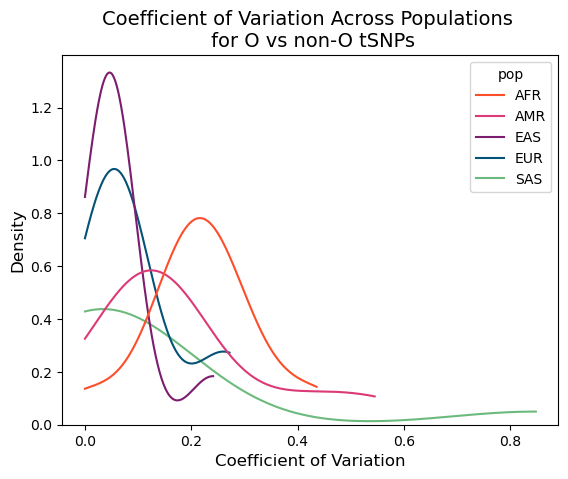

In [132]:
# make a new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']
# set the new color palette
sns.set_palette(color_palette)

# make a density plot
sns.kdeplot(
    data=df_o_sum_stat, x="coefficient_variation", hue="pop", cut=0)
plt.title('Coefficient of Variation Across Populations \n for O vs non-O tSNPs', fontsize=14)
plt.xlabel('Coefficient of Variation', fontsize=12)
plt.ylabel('Density', fontsize=12)

# save figure
plt.savefig(f"{directory}results/python_figures/o_cov.svg", 
           format='svg',
           bbox_inches="tight")

# save figure
plt.savefig(f"{directory}results/python_figures/o_cov.svg", 
           format='svg',
           bbox_inches="tight")

## Kruskal Wallis and Dunn's Test

I want to compare the populations within each tSNP so I first my prep the data and save it as a csv. Then, I prefer to use R instead of python for the actuall statistical tests so I will read in the csv.

### Data Prep

To prep the data I need to make datatables for each SNP. 

In [133]:
# print the first few rows
df_o_subs.head()

,Tag SNP,Functional SNP,Population,R2,D',Continent
1,rs505922,rs8176719,ITU,0.9174,0.9783,SAS
2,rs505922,rs8176719,STU,0.9784,1.0000,SAS
3,rs505922,rs8176719,BEB,0.9313,0.9764,SAS
4,rs505922,rs8176719,PJL,0.9367,0.9783,SAS
5,rs505922,rs8176719,GIH,0.9045,1.0000,SAS


In [134]:
# return unique elements from column
df_o_subs['Tag SNP'].unique()

array(['rs505922', 'rs514659', 'rs529565', 'rs612169', 'rs657152',
       'rs687289', 'rs8176645', 'rs8176693', 'rs8176704', 'rs8176719'],
      dtype=object)

In [135]:
# subset by tag SNP

# rs505922
df_o_rs505922 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs505922"]
# rs514659
df_o_rs514659 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs514659"]
# rs529565
df_o_rs529565 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs529565"]
# rs612169
df_o_rs612169 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs612169"]
# rs657152
df_o_rs657152 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs657152"]
# rs687289
df_o_rs687289 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs687289"]
# rs8176645
df_o_rs8176645 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs8176645"]
# rs8176693
df_o_rs8176693 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs8176693"]
# rs8176704
df_o_rs8176704 = df_o_subs.loc[df_o_subs['Tag SNP'] == "rs8176704"]

In [137]:
# save the dataframes

# export csv file
df_o_rs505922.to_csv(f"{directory}results/ldlink_results/o_data/rs505922.csv")
df_o_rs514659.to_csv(f"{directory}results/ldlink_results/o_data/rs514659.csv")
df_o_rs529565.to_csv(f"{directory}results/ldlink_results/o_data/rs529565.csv")
df_o_rs612169.to_csv(f"{directory}results/ldlink_results/o_data/rs612169.csv")
df_o_rs657152.to_csv(f"{directory}results/ldlink_results/o_data/rs657152.csv")
df_o_rs687289.to_csv(f"{directory}results/ldlink_results/o_data/rs687289.csv")
df_o_rs8176645.to_csv(f"{directory}results/ldlink_results/o_data/rs8176645.csv")
df_o_rs8176693.to_csv(f"{directory}results/ldlink_results/o_data/rs8176693.csv")
df_o_rs8176704.to_csv(f"{directory}results/ldlink_results/o_data/rs8176704.csv")

# <span style="color:dodgerblue">A/B data</span>

Just using the data for the subpopulations so need to remove the data from the superpopulations (ALL, AFR, AMR, EAS, EUR, SAS). 

In [138]:
# remove super populations
df_ab_subs = df_ab.loc[(df_ab['Population'] != "ALL") & 
                       (df_ab['Population'] != "AFR") & 
                       (df_ab['Population'] != "AMR") & 
                       (df_ab['Population'] != "EAS") & 
                       (df_ab['Population'] != "EUR") &
                       (df_ab['Population'] != "SAS")]
df_ab_subs

,Tag SNP,Functional SNP,Population,R2,D',Continent
1,rs7853989,rs8176746,ITU,0.9477,1.0,SAS
2,rs7853989,rs8176746,STU,0.9697,1.0,SAS
3,rs7853989,rs8176746,BEB,0.9399,1.0,SAS
4,rs7853989,rs8176746,PJL,1.0000,1.0,SAS
5,rs7853989,rs8176746,GIH,0.9243,1.0,SAS
...,...,...,...,...,...,...
280,rs8176749,rs8176746,GWD,1.0000,1.0,AFR
281,rs8176749,rs8176746,LWK,1.0000,1.0,AFR
282,rs8176749,rs8176746,YRI,1.0000,1.0,AFR
285,rs8176749,rs8176746,STU,1.0000,1.0,SAS


In [139]:
# subset by continental population

# AFR
df_ab_afr = df_ab_subs.loc[df_ab_subs['Continent'] == "AFR"]
# AMR
df_ab_amr = df_ab_subs.loc[df_ab_subs['Continent'] == "AMR"]
# EAS
df_ab_eas = df_ab_subs.loc[df_ab_subs['Continent'] == "EAS"]
# EUR
df_ab_eur = df_ab_subs.loc[df_ab_subs['Continent'] == "EUR"]
# SAS
df_ab_sas = df_ab_subs.loc[df_ab_subs['Continent'] == "SAS"]

In [140]:
# summary stats grouped by tag SNP

# define function for coefficient of variation
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
# define variance
var = lambda x: np.var(x)

# AFR
df_ab_afr_sum_stat = df_ab_afr[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_ab_afr_sum_stat['pop'] = 'AFR' # add a new population column
df_ab_afr_sum_stat['median'] = df_ab_afr[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_ab_afr_sum_stat['coefficient_variation'] = df_ab_afr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_ab_afr_sum_stat['variance'] = df_ab_afr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# AMR
df_ab_amr_sum_stat = df_ab_amr[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_ab_amr_sum_stat['pop'] = 'AMR' # add a new population column
df_ab_amr_sum_stat['median'] = df_ab_amr[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_ab_amr_sum_stat['coefficient_variation'] = df_ab_amr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_ab_amr_sum_stat['variance'] = df_ab_amr[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# EAS
df_ab_eas_sum_stat = df_ab_eas[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_ab_eas_sum_stat['pop'] = 'EAS' # add a new population column
df_ab_eas_sum_stat['median'] = df_ab_eas[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_ab_eas_sum_stat['coefficient_variation'] = df_ab_eas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_ab_eas_sum_stat['variance'] = df_ab_eas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# EUR
df_ab_eur_sum_stat = df_ab_eur[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_ab_eur_sum_stat['pop'] = 'EUR' # add a new population column
df_ab_eur_sum_stat['median'] = df_ab_eur[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_ab_eur_sum_stat['coefficient_variation'] = df_ab_eur[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_ab_eur_sum_stat['variance'] = df_ab_eur[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance
# SAS
df_ab_sas_sum_stat = df_ab_sas[['R2', 'Tag SNP']].groupby('Tag SNP').describe()
df_ab_sas_sum_stat['pop'] = 'SAS' # add a new population column
df_ab_sas_sum_stat['median'] = df_ab_sas[['R2', 'Tag SNP']].groupby('Tag SNP').median() # add median
df_ab_sas_sum_stat['coefficient_variation'] = df_ab_sas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(cv) # coeffecient of variation
df_ab_sas_sum_stat['variance'] = df_ab_sas[['R2', 'Tag SNP']].groupby('Tag SNP').apply(var) # add variance

C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\klmartinez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axi

In [141]:
# merge the datasets
df_ab_sum_stat = pd.concat([df_ab_afr_sum_stat,
                           df_ab_amr_sum_stat, 
                           df_ab_eas_sum_stat,
                           df_ab_eur_sum_stat,
                           df_ab_sas_sum_stat])

df_ab_sum_stat.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'pop', 'median', 'coefficient_variation', 'variance'] # rename columns
df_ab_sum_stat['fSNP'] = 'ab_snp_rs8176746'
df_ab_sum_stat = df_ab_sum_stat[['pop', 'count', 'median', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'variance', 'coefficient_variation','fSNP']] # reorder columns
df_ab_sum_stat

,pop,count,median,mean,std,min,25%,50%,75%,max,variance,coefficient_variation,fSNP
Tag SNP,,,,,,,,,,,,,
rs7853989,AFR,7.0,1.0000,0.949000,0.068676,0.8416,0.90070,1.0000,1.000000,1.0000,0.004043,0.072366,ab_snp_rs8176746
rs8176672,AFR,7.0,0.5039,0.564800,0.203929,0.3082,0.41405,0.5039,0.747450,0.8185,0.035646,0.361063,ab_snp_rs8176746
rs8176720,AFR,7.0,0.2189,0.207300,0.036048,0.1420,0.19130,0.2189,0.229350,0.2489,0.001114,0.173893,ab_snp_rs8176746
rs8176722,AFR,7.0,0.7345,0.746314,0.112516,0.5702,0.68570,0.7345,0.828900,0.8903,0.010851,0.150763,ab_snp_rs8176746
rs8176741,AFR,7.0,1.0000,0.989986,0.017113,0.9639,0.98300,1.0000,1.000000,1.0000,0.000251,0.017287,ab_snp_rs8176746
rs8176743,AFR,7.0,1.0000,0.989986,0.017113,0.9639,0.98300,1.0000,1.000000,1.0000,0.000251,0.017287,ab_snp_rs8176746
rs8176746,AFR,7.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.000000,1.0000,0.000000,0.000000,ab_snp_rs8176746
rs8176747,AFR,7.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.000000,1.0000,0.000000,0.000000,ab_snp_rs8176746
rs8176749,AFR,7.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.000000,1.0000,0.000000,0.000000,ab_snp_rs8176746


## Plotting coefficient of variation

In [142]:
# add a column of consecutive numbers
df_ab_sum_stat.insert(0, 'datapoint', range(1, 1 + len(df_ab_sum_stat)))
# drop if there are nans in specific column
df_ab_sum_stat=df_ab_sum_stat[pd.notnull(df_ab_sum_stat['coefficient_variation'])]
# reset index
df_ab_sum_stat = df_ab_sum_stat.reset_index()

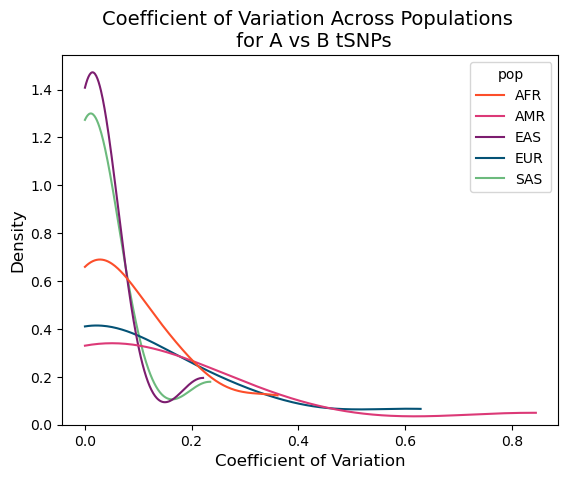

In [143]:
# make a new color palette
color_palette = ['#FC4E2A','#DC3977','#7C1D6F', '#045275', '#6CBA7D']
# set the new color palette
sns.set_palette(color_palette)

# make a density plot
sns.kdeplot(
    data=df_ab_sum_stat, x="coefficient_variation", hue="pop", cut=0)
plt.title('Coefficient of Variation Across Populations \n for A vs B tSNPs', fontsize=14)
plt.xlabel('Coefficient of Variation', fontsize=12)
plt.ylabel('Density', fontsize=12)

# save figure
plt.savefig(f"{directory}results/python_figures/ab_cov.svg", 
           format='svg',
           bbox_inches="tight")

## Kruskal Wallis and Dunn's Test

I want to compare the populations within each tSNP so I first my prep the data and save it as a csv. Then, I prefer to use R instead of python for the actuall statistical tests so I will read in the csv.

### Data Prep

To prep the data I need to make datatables for each SNP. 

In [144]:
# print the first few rows
df_ab_subs.head()

,Tag SNP,Functional SNP,Population,R2,D',Continent
1,rs7853989,rs8176746,ITU,0.9477,1.0,SAS
2,rs7853989,rs8176746,STU,0.9697,1.0,SAS
3,rs7853989,rs8176746,BEB,0.9399,1.0,SAS
4,rs7853989,rs8176746,PJL,1.0000,1.0,SAS
5,rs7853989,rs8176746,GIH,0.9243,1.0,SAS


In [145]:
# return unique elements from column
df_ab_subs['Tag SNP'].unique()

array(['rs7853989', 'rs8176672', 'rs8176720', 'rs8176722', 'rs8176741',
       'rs8176743', 'rs8176746', 'rs8176747', 'rs8176749'], dtype=object)

In [146]:
# subset by tag SNP

# rs7853989
df_ab_rs7853989 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs7853989"]
# rs8176672
df_ab_rs8176672 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176672"]
# rs8176720
df_ab_rs8176720 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176720"]
# rs8176722
df_ab_rs8176722 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176722"]
# rs8176741
df_ab_rs8176741 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176741"]
# rs8176743
df_ab_rs8176743 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176743"]
# rs8176746
df_ab_rs8176746 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176746"]
# rs8176747
df_ab_rs8176747 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176747"]
# rs8176749
df_ab_rs8176749 = df_ab_subs.loc[df_ab_subs['Tag SNP'] == "rs8176749"]

In [148]:
# save the dataframes

# export csv file
df_ab_rs7853989.to_csv(f"{directory}results/ldlink_results/ab_data/rs7853989.csv")
df_ab_rs8176672.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176672.csv")
df_ab_rs8176720.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176720.csv")
df_ab_rs8176722.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176722.csv")
df_ab_rs8176741.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176741.csv")
df_ab_rs8176743.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176743.csv")
df_ab_rs8176746.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176746.csv")
df_ab_rs8176747.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176747.csv")
df_ab_rs8176749.to_csv(f"{directory}results/ldlink_results/ab_data/rs8176749.csv")

# <span style="color:dodgerblue">Final dataset of summary stats</span>


In [149]:
# merge the datasets
df_sum_stat = pd.concat([df_o_sum_stat, df_ab_sum_stat])
df_sum_stat

,Tag SNP,datapoint,pop,count,median,mean,std,min,25%,50%,75%,max,variance,coefficient_variation,fSNP
0,rs505922,1,AFR,7.0,0.4492,0.446386,0.117614,0.2187,0.42880,0.4492,0.49780,0.6036,0.011857,0.263480,o_snp_rs8176719
1,rs514659,2,AFR,7.0,0.3055,0.308014,0.067141,0.2090,0.26205,0.3055,0.36440,0.3887,0.003864,0.217981,o_snp_rs8176719
2,rs529565,3,AFR,7.0,0.3941,0.392514,0.067356,0.2932,0.34785,0.3941,0.44235,0.4799,0.003889,0.171602,o_snp_rs8176719
3,rs612169,4,AFR,7.0,0.3055,0.307186,0.067950,0.2090,0.25915,0.3055,0.36440,0.3887,0.003958,0.221201,o_snp_rs8176719
4,rs657152,5,AFR,7.0,0.3828,0.350700,0.082652,0.2160,0.29805,0.3828,0.40340,0.4532,0.005855,0.235676,o_snp_rs8176719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,rs8176741,41,SAS,5.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.00000,1.0000,0.000000,0.000000,ab_snp_rs8176746
41,rs8176743,42,SAS,5.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.00000,1.0000,0.000000,0.000000,ab_snp_rs8176746
42,rs8176746,43,SAS,5.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.00000,1.0000,0.000000,0.000000,ab_snp_rs8176746
43,rs8176747,44,SAS,5.0,1.0000,1.000000,0.000000,1.0000,1.00000,1.0000,1.00000,1.0000,0.000000,0.000000,ab_snp_rs8176746


In [150]:
# export csv file
df_sum_stat.to_csv(f"{directory}results/ldlink_results/summary_stats.csv")